![Astrofisica Computacional](../logo.PNG)

---
## 01. Numerical Integration


Eduard Larrañaga (ealarranaga@unal.edu.co)

---

### Summary

In this notebook some numerical integration techniques are presented.

---

One of the most common tasks in astrophysics is to evaluate integrals such as

\begin{equation}
I = \int_a^b f(x) dx ,
\end{equation}

and, in many cases, these cannot be done analytically. The integrand in these expressions can be given as an analytic function $f(x)$ or as a discrete set of values ​​$f(x_i)$. We will now describe some techniques for performing these integrals numerically in both cases.
 
---
## Interpolation by intervals and quadratures

Any method of integration that uses a weighted addition is called the **rule of quadratures**. Suppose we know (or can evaluate) the integrand $f(x)$ on a finite set of *nodes*, $\{x_j\}$ with $j=0,\cdots,n-1$ on the interval $[ a,b]$ and such that $x_0 = a$ and $x_{n-1} = b$. This will give a set of $n$ nodes or equivalently $N=n-1$ intervals. A discrete approximation of the integral of this function is given by the **rectangle rule**,

\begin{equation}
I = \int_a^b f(x) dx \approx \Delta x \sum_{i=0}^{N} f(x_i),
\end{equation}

where the width of the intervals is $\Delta x = \frac{b-a}{N}$. From the definition of an integral, it is clear that this approximation converges to the real value of the integral when $N\rightarrow \infty$, i.e. when $\Delta x \rightarrow 0$.

Although the rectangle rule can give a good approximation of the integral, it can be improved by using an interpolated function on each interval. Methods using polynomial interpolation are generally called **Newton-Cotes quadratures**.

---
### Midpoint rule

The simplest modification to the rectangle rule described above is to use the central value of the function $f(x)$ in each interval instead of the value at one of the nodes. Thus, if it is possible to evaluate the integrand at the midpoint of each interval, the approximate value of the integral will be given by

\begin{equation}
I = \int_{a}^{b} f(x) dx = \sum{i=0}^{N} (x_{i+1} - x_i) f(\bar{x}_i ),
\end{equation}

where $\bar{x}_i = \frac{x_i + x_{i+1}}{2}$ is the midpoint in the interval $[x_i, x_{i+1}]$.

In order to estimate the error associated with this method, a Taylor series expansion of the integrand on the interval $[x_i, x_{i+1}]$ around the midpoint $\bar{x}_i$ is used,

\begin{equation}
f(x) = f(\bar{x}_i) + f'(\bar{x}_i)(x-\bar{x}_i) + \frac{f''(\bar{x}_i) }{2}(x-\bar{x}_i)^2 + \frac{f'''(\bar{x}_i)}{6}(x-\bar{x}_i)^3 + . ..
\end{equation}

Integrating this expression from $x_i$ to $x_{i+1}$, and noting that the odd order terms cancel, we obtain

\begin{equation}
\int_{x_i}^{x_{i+1}} f(x)dx = f(\bar{x}_i)(x_{i+1}-x_i) + \frac{f''(\bar{ x}_i)}{24}(x_{i+1}-x_i)^3 + ...
\end{equation}

This expansion shows that the error associated with the approximation on each interval is of order $\varepsilon_i = (x_{i+1}-x_i)^3$. Since the total integral is obtained as a sum of $N$ similar integrals (one for each subinterval), the total error is of order $\varepsilon = N \varepsilon_i $.

When the nodes are equally spaced, we can write the size of these intervals as $\Delta x = \frac{b - a}{N}$ and thus the error associated with each interval is $\varepsilon_i =\frac{( b - a)^3}{n^3} = \Delta x^3$, while the total quadrature error will be of order $\varepsilon = N \varepsilon_i = \frac{(b - a)^3} {N^2} = N\Delta x^3$.

#### Example. Numerical integration

We will read the function data from a .txt file and numerically estimate the value of the integral of this function using the midpoint rule. Because the function is given in discrete point form (and not in analytical form), it is not possible to evaluate the value of the function at the midpoints, so we will initially use the value at the first point of each of the intervals to compute the partial sums.

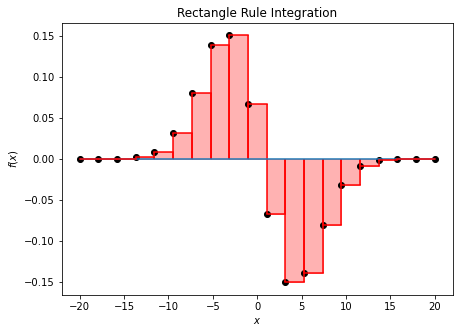

The result of the numerical integration
between x = -20.0 and x = 20.0 is I = 5.01388e-06


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
data = np.loadtxt('data_points1.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

n = len(x) # Number of nodes
N = n-1 # Number of intervals

plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N):
    dx = x[i+1] - x[i]
    Integral = Integral + dx*f[i]
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Rectangle Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration')
print(f'between x = {x[0]:.1f} and x = {x[N]:.1f} is I = {Integral:.5e}')

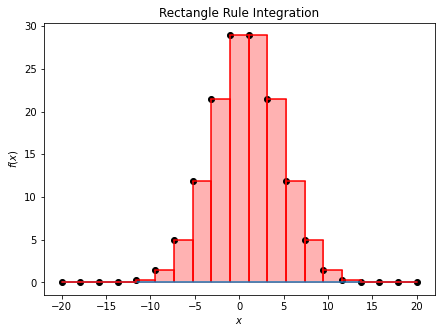

The result of the numerical integration
between x = -20.0 and x = 20.0 is I = 2.91244e+02


In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reading the data
data = np.loadtxt('data_points2.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

n = len(x) # Number of nodes
N = n-1 # Number of intervals


plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N):
    dx = x[i+1] - x[i]
    Integral = Integral + dx*f[i]
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Rectangle Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration')
print(f'between x = {x[0]:.1f} and x = {x[N]:.1f} is I = {Integral:.5e}')

---
### Trapezoid Rule

The following generalization of the rectangle rule corresponds to approximating the function $f(x)$ with a linear polynomial on each of the intervals. This is known as the **trapezoid rule** and the corresponding quadrature will be given by

\begin{equation}
I = \int_{a}^{b} f(x) dx = \sum{i=0}^{N} \frac{1}{2} (x_{i+1} - x_i) \left[ f(x_{i+1}) + f(x_i) \right] .
\end{equation}

Contrary to what happens in the midpoint rule, this method does not require the evaluation of the integrand at the midpoint but at the two nodes of each interval.

#### Example. Integration with the trapezoid rule.

Again, the function data will be read from a .txt file and it will be numerically integrated using the trapezoid rule.

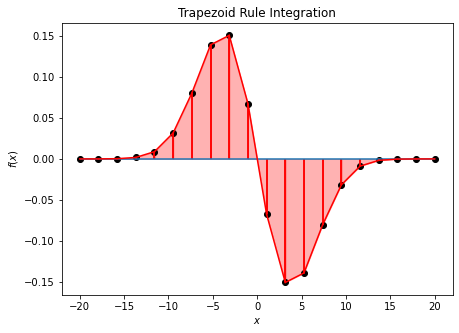

The result of the numerical integration
between x = -20.0 and x = 20.0 is I = -7.87808e-17


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
data = np.loadtxt('data_points1.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

n = len(x) # Number of nodes
N = n-1 # Number of intervals

plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N):
    dx = x[i+1] - x[i]
    f_mean = (f[i] + f[i+1])/2
    Integral = Integral + dx*f_mean
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i+1]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i+1]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i+1]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Trapezoid Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration')
print(f'between x = {x[0]:.1f} and x = {x[N]:.1f} is I = {Integral:.5e}')

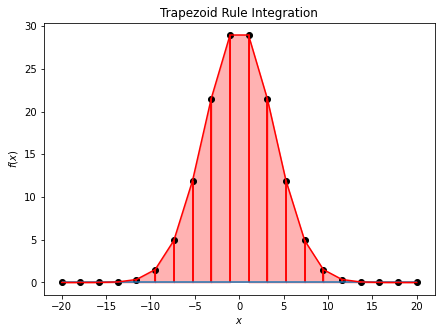

The result of the numerical integration
between x = -20.0 and x = 20.0 is I = 2.91244e+02


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Reading the data
data = np.loadtxt('data_points2.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

n = len(x) # Number of nodes
N = n-1 # Number of intervals

plt.figure(figsize=(7,5))

# Numerical integration loop
Integral = 0.
for i in range(N):
    dx = x[i+1] - x[i]
    f_mean = (f[i] + f[i+1])/2
    Integral = Integral + dx*f_mean
    
    plt.vlines([x[i], x[i+1]], 0, [f[i], f[i+1]], color='red')
    plt.plot([x[i], x[i+1]], [f[i], f[i+1]],color='red')
    plt.fill_between([x[i], x[i+1]], [f[i], f[i+1]],color='red', alpha=0.3)

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Trapezoid Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration')
print(f'between x = {x[0]:.1f} and x = {x[N]:.1f} is I = {Integral:.5e}')


---
## Simpson's rule

Simpson's rule is a method in which the integral $f(x)$ is estimated by approximating the integrand by a second order polynomial on each interval.

If three values of the function are known; $f_1 =f(x_1)$, $f_2 =f(x_2)$ and $f_3 =f(x_3)$; at the points $x_1 < x_2 < x_3$, a second order polynomial of the form can be fit
he
\begin{equation}
p_2 (x) = A (x-x_1)^2 + B (x-x_1) + C .
\end{equation}

Integrating this polynomial over the interval $[x_1 , x_3]$, we get

\begin{equation}
\int_{x_1}^{x_3} p_2 (x) dx = \frac{x_3 - x_1}{6} \left( f_1 + 4f_2 + f_3 \right) + \mathcal{O} \left( (x_3 - x_1)^4\right)
\end{equation}

---
### Simpson's rule with equally spaced nodes

If there are $n$ equally spaced nodes in the interval of integration, or equivalently $N=n-1$ intervals with constant width $\Delta x$, the total integral using Simpson's rule is written in the form

\begin{equation}
I = \int_a^b f(x) dx \approx \frac{\Delta x}{3} \sum_{i=0}^{\frac{N-1}{2}} \left[ f(x_{2i }) + 4f(x_{2i+1}) + f(x_{2i+2}) \right] + \mathcal{O} \left(f''' \Delta x^4 \right)
\end{equation}

The numerical error in each interval is of order $\Delta x^4$ and therefore, the total integral will have an error of order $N \Delta x^4 = \frac{(a-b)^4}{N^3 }$.

#### Example. Integration with Simpson's rule

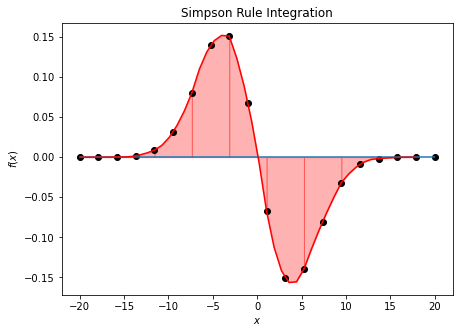

The result of the numerical integration
between x = -20.0 and x = 20.0 is I = -8.84959e-06


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def quadraticInterpolation(x1, x2, x3, f1, f2, f3, x):
    p2 = (((x-x2)*(x-x3))/((x1-x2)*(x1-x3)))*f1 + (((x-x1)*(x-x3))/((x2-x1)*(x2-x3)))*f2 +\
         (((x-x1)*(x-x2))/((x3-x1)*(x3-x2)))*f3
    return p2

# Reading the data
data = np.loadtxt('data_points1.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

n = len(x) # Number of nodes
N = n-1 # Number of intervals

plt.figure(figsize=(7,5))

# Numerical integration loop
integral = 0.
i = 0
while  2*i+2 < n:
    dx = x[2*i+1] - x[2*i] 
    integral += dx*(f[2*i] + 4*f[2*i+1] + f[2*i+2])/3
    
    x_interval = np.linspace(x[2*i],x[2*i+2],6)
    y_interval = quadraticInterpolation(x[2*i], x[2*i+1], x[2*i+2], f[2*i], f[2*i+1], f[2*i+2], x_interval)
    plt.plot(x_interval, y_interval,'r')
    plt.fill_between(x_interval, y_interval, color='red', alpha=0.3)
    i += 1
# Last interval if it is not reached with the Simpson's rule
if 2*i+2 != n-1:
    dx = x[-1] - x[-2]
    f_mean = (f[-1] + f[-2])/2
    integral += dx*f_mean

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Simpson Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration')
print(f'between x = {x[0]:.1f} and x = {x[N]:.1f} is I = {integral:.5e}')


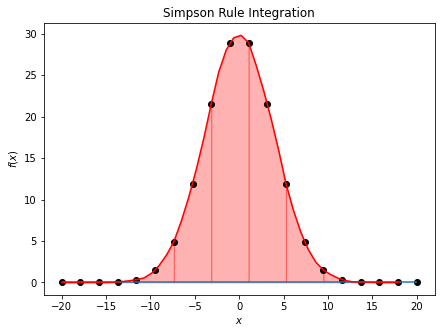

The result of the numerical integration
between x = -20.0 and x = 20.0 is I = 2.91244e+02


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def quadraticInterpolation(x1, x2, x3, f1, f2, f3, x):
    p2 = (((x-x2)*(x-x3))/((x1-x2)*(x1-x3)))*f1 + (((x-x1)*(x-x3))/((x2-x1)*(x2-x3)))*f2 +\
         (((x-x1)*(x-x2))/((x3-x1)*(x3-x2)))*f3
    return p2

# Reading the data
data = np.loadtxt('data_points2.txt', comments='#', delimiter=',')
x = data[:,0]
f = data[:,1]

n = len(x) # Number of nodes
N = n-1 # Number of intervals

plt.figure(figsize=(7,5))

# Numerical integration loop
integral = 0.
i = 0
while  2*i+2 < n:
    dx = x[2*i+1] - x[2*i] 
    integral += dx*(f[2*i] + 4*f[2*i+1] + f[2*i+2])/3
    
    x_interval = np.linspace(x[2*i],x[2*i+2],6)
    y_interval = quadraticInterpolation(x[2*i], x[2*i+1], x[2*i+2], f[2*i], f[2*i+1], f[2*i+2], x_interval)
    plt.plot(x_interval, y_interval,'r')
    plt.fill_between(x_interval, y_interval, color='red', alpha=0.3)
    i += 1

# Last interval if it is not reached with the Simpson's rule
if 2*i+2 != n-1:
    dx = x[-1] - x[-2]
    f_mean = (f[-1] + f[-2])/2
    integral += dx*f_mean

plt.scatter(x, f, color='black')
plt.hlines(0, x.min(), x.max())
plt.title('Simpson Rule Integration')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.show()

print(f'The result of the numerical integration')
print(f'between x = {x[0]:.1f} and x = {x[N]:.1f} is I = {integral:.5e}')

---
### Simpson's rule for non-equidistant nodes

When the nodes of the discretization mesh of $f(x)$ are not equally spaced, Simpson's rule must be modified in the form

\begin{equation}
I = \int_a^b f(x) dx \approx \sum_{i=0}^{\frac{N-1}{2}} \left[ \alpha f(x_{2i}) + \beta f(x_ {2i+1}) +\gamma f(x_{2i+2}) \right]
\end{equation}

where

\begin{align}
\alpha = &\frac{-h_{2i+1}^2 + h_{2i+1} h_{2i} + 2 h_{2i}^2}{6 h_{2i}} \\
\beta = &\frac{ (h_{2i+1} + h_{2i})^3 }{6 h_{2i+1} h_{2i}} \\
\gamma =& \frac{2 h_{2i+1}^2 + h_{2i+1} h_{2i} - h_{2i}^2}{6 h_{2i+1}}
\end{align}

and $h_j = x_{j+1} - x_j$.

---

## (Self-) Convergence Factor for Simpson's Rule

To check the accuracy of the Simpson Integration Method, we compute the self-convergence factor by integrating the function $\sin x$ over the interval $0\leq x \leq 2\pi$.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def intsin(n):
    x = np.linspace(0, 2*np.pi, n)
    f = np.sin(x)
    dx = x[1] - x[0]
    N = n-1 # Number of intervals
    # Numerical integration loop
    integral = 0.
    i = 0
    while 2*i+2 < n:
        integral += dx*(f[2*i] + 4*f[2*i+1] + f[2*i+2])/3
        i += 1
    # Last interval if it is not reached with the Simpson's rule
    if 2*i+2 != n-1:
        dx = x[-1] - x[-2]
        f_mean = (f[-1] + f[-2])/2
        integral += dx*f_mean
    return integral

n=100
y = intsin(n)
print(f'The result of the numerical integration with n = {n:.0f} is I = {y:.4e}')

The result of the numerical integration with n = 100 is I = 6.7603e-07


In [14]:
y_1 = intsin(100)
y_2 = intsin(1000)
y_3 = intsin(10000)

C_self = np.abs(y_3 - y_2)/np.abs(y_2 - y_1)


print(f'The convergence factor is C = {C_self:.2f}')
print(f'which corresponds to a precision of h^{-np.log10(C_self):.1f}')

The convergence factor is C = 0.00
which corresponds to a precision of h^4.0
